In [1]:
import tflearn
import numpy as np
import pickle
from tflearn.optimizers import SGD
from plot_samples import plot_samples

from write_submission import write_submission

import matplotlib
%matplotlib inline

In [2]:
# Choose model architecture
import v1_single_layer as m
#import v2_convnet as m

In [3]:
# Load data
(X, Y), (X_test, _) = pickle.load(open("data.p", "rb"))

In [4]:
optimizer_ = m.optimizer()
# Adjust hyperparameters
#optimizer_ = SGD(learning_rate=0.7, lr_decay=0.96, decay_step=2400)

In [5]:
regression_ = tflearn.regression(m.network(), optimizer=optimizer_, loss='mean_square')

In [6]:
model = tflearn.DNN(regression_, checkpoint_path='models/checkpoints/model.tfl.ckpt', max_checkpoints=3, tensorboard_verbose=0, tensorboard_dir='/tmp/tflearn_logs/')

INFO:tensorflow:Summary name Loss/ (raw) is illegal; using Loss/__raw_ instead.


In [7]:
# Optionally load weights from a checkpoint or a previous save
#model.load("models/checkpoints/model.tfl.ckpt")
#model.load("models/v1/model.tflearn")

In [8]:
model.fit(X, Y, run_id='v1-single-layer', n_epoch=100, validation_set=0.1, shuffle=True, show_metric=True, batch_size=64, snapshot_step=200, snapshot_epoch=False)

Training Step: 3100  | total loss: 0.00253 | time: 0.348s
| SGD | epoch: 100 | loss: 0.00253 - acc: 0.7133 -- iter: 1926/1926


In [9]:
model.save('models/v1/model.tflearn')

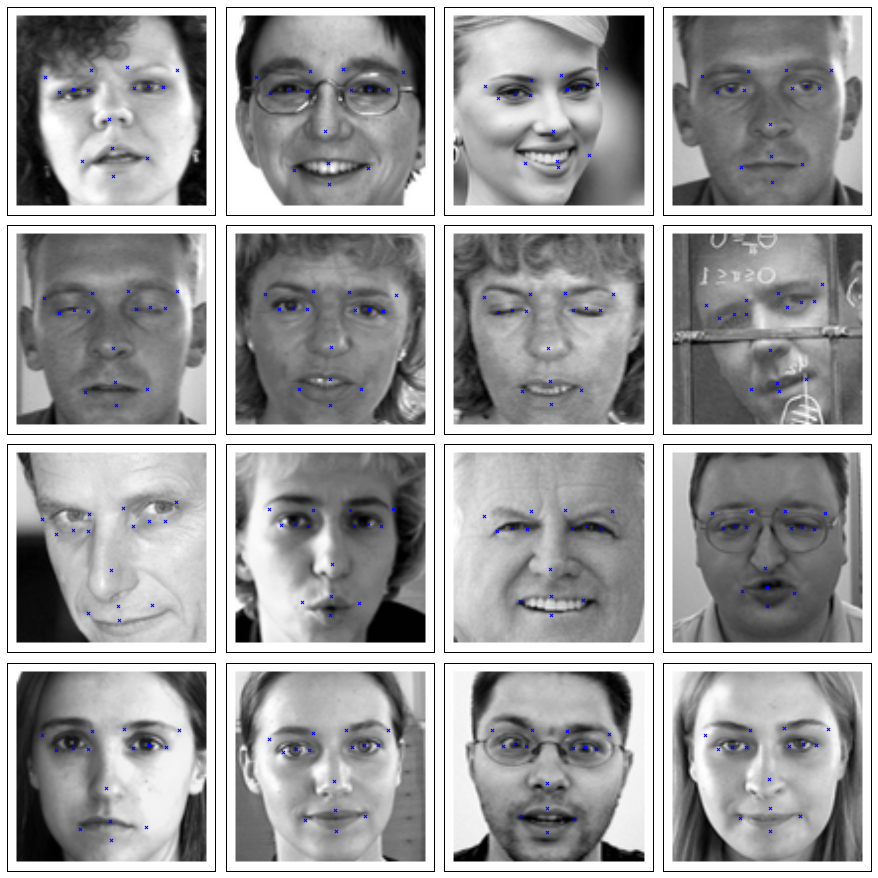

In [10]:
plot_samples(X[10:], np.array(model.predict(X[10:])))

In [15]:
write_submission(np.array(model.predict(X_test))

Wrote submission/submission-2017-01-16T22-47-06.804024.csv
